In [2]:
import numpy as np
#Aljabar Linear

import pandas as pd
#Datarafame

#plotting 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Quandl

import quandl

# Ambil data dari Quandl

In [4]:
df = quandl.get("BITFINEX/BTCUSD", authtoken="C5CQZuxZM7EbJvzMBGhm")
df.tail(3)

,High,Low,Mid,Last,Bid,Ask,Volume
Date,,,,,,,
2019-03-02,3924.0,3838.894118,3912.75,3912.734321,3912.7,3912.8,5102.242203
2019-03-03,3925.0,3855.000000,3882.95,3883.000000,3882.9,3883.0,2872.434112
2019-03-04,3911.1,3767.000000,3799.95,3799.900000,3799.9,3800.0,10169.223854


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1742 entries, 2014-04-15 to 2019-03-04
Data columns (total 7 columns):
High      1742 non-null float64
Low       1742 non-null float64
Mid       1742 non-null float64
Last      1742 non-null float64
Bid       1742 non-null float64
Ask       1742 non-null float64
Volume    1742 non-null float64
dtypes: float64(7)
memory usage: 108.9 KB


In [6]:
df.isnull().sum()

High      0
Low       0
Mid       0
Last      0
Bid       0
Ask       0
Volume    0
dtype: int64

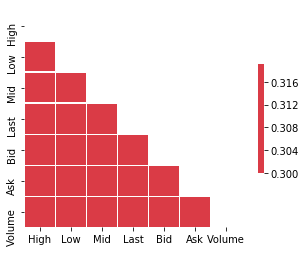

In [9]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(6,4))

cmap = sns.diverging_palette(220,10, as_cmap=True)

sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=.3,
            center=0, square=True, linewidths=.5,
            cbar_kws={"shrink": .5})

In [10]:
y = df["Mid"]
x = df[["High","Low"]]

Date
2014-04-15    504.235
2014-04-16    537.500
2014-04-17    507.020
Name: Mid, dtype: float64

In [13]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(x)
x_normalized = pd.DataFrame(np_scaled)
x_normalized.head(3)

,0,1
0,0.025836,0.024272
1,0.027500,0.026581
2,0.027073,0.026104


In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x_normalized, y, test_size=0.3,
    random_state=None)

# Prediksi

In [18]:
from sklearn import linear_model

RR_reg = linear_model.Ridge()
RR_train = RR_reg.fit(x_train, y_train)

In [19]:
RR_pred = RR_train.predict(x_test)

In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, RR_pred)

9096.384683328622

In [22]:
from sklearn.metrics import r2_score

r2_score(y_test, RR_pred)

0.9991815167590244

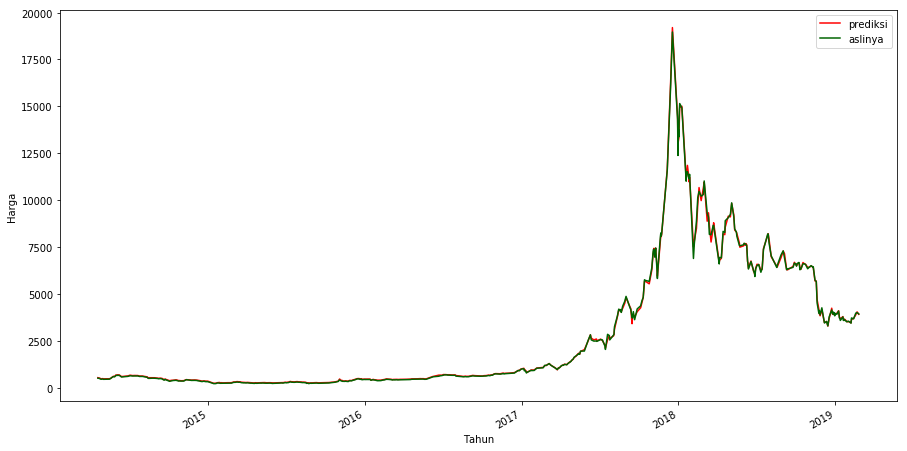

In [24]:
prediksi = pd.DataFrame(RR_pred, index=y_test.index
                       ,columns=['price'])

prediksi.plot(figsize=(15,8),color='red')
y_test.plot(color='darkgreen')

plt.legend(['prediksi','aslinya'])

plt.ylabel('Harga')
plt.xlabel('Tahun')

plt.show()

In [25]:
RR_train.predict(x.tail(30))

array([67824577.55043267, 67508351.87011284, 67117622.73291308,
       67064045.95420114, 66454896.64185561, 65979631.42419298,
       69414839.3640531 , 71221120.02170874, 71072755.08161743,
       71194168.32363684, 70726128.96954383, 70740085.45883529,
       70231067.54803133, 70616291.1716703 , 70888543.23411794,
       71435209.81269994, 74366355.94966495, 76948318.12903099,
       77063193.78473191, 77398633.09651221, 77329092.24505056,
       79372446.88365412, 74806118.37105252, 74786498.64835328,
       73847858.70502268, 75435301.81776306, 75213437.39240603,
       74465398.71294232, 74623984.79629357, 73673570.23384592])

In [26]:
df.tail(1)

,High,Low,Mid,Last,Bid,Ask,Volume
Date,,,,,,,
2019-03-04,3911.1,3767.0,3799.95,3799.9,3799.9,3800.0,10169.223854
